In [1]:
# Plot inside the notebook
%matplotlib inline
# this is used for debugging purposes only. allows to reload classes when changed
%load_ext autoreload
%autoreload 2

In [2]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
%cd ..

/Users/Espenel/Documents/bioimage-analysis/code_git/track_cell_division


In [4]:
# load all the necessary modules for the analysis
from script import *
from skimage import io
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
# General parameters of the plot
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [7]:
img = io.imread('data/Pos4_Green.tif')
img_red = io.imread('data/Pos4_Red.tif')

In [8]:
#stack = np.stack((img, img_red))

In [9]:
#img_rgb = display.to_rgb(stack, auto = True, bf=False)

In [10]:
#z, _ , _, _ = img_rgb.shape

# Create and plot an overlay image of Red and Green Channels

In [11]:
stack = np.stack((img, img_red))
img_rgb = display.to_rgb(stack, auto = True, bf=False)

In [12]:
frame=10

(-0.5, 1023.5, 1023.5, -0.5)

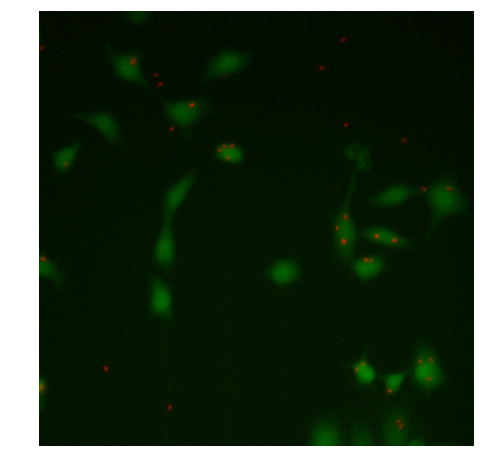

In [13]:
plt.imshow(img_rgb[frame])
plt.axis("off")
#plt.savefig("frame_{}.png".format(x),bbox_inches='tight' , dpi = 50)

# Cell division event

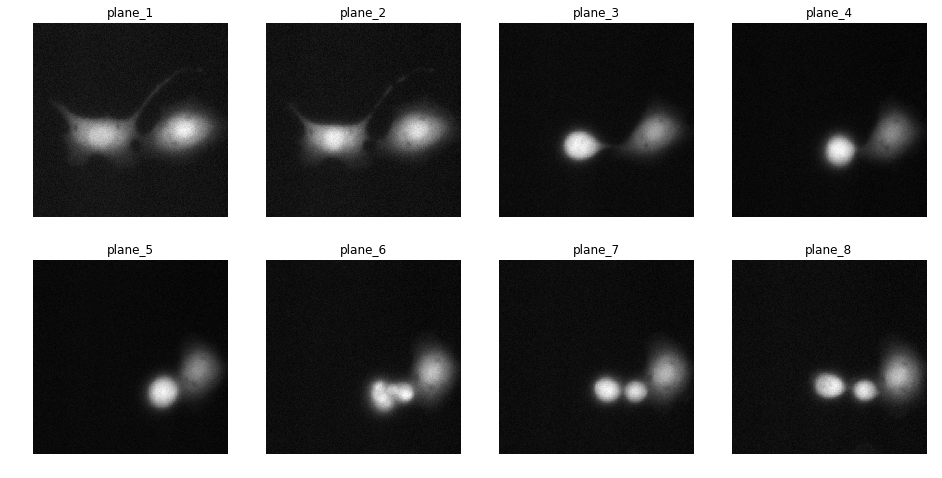

In [14]:
fig, axes = plt.subplots(2,4, figsize=(16,8))

for i in range(2):
    for j in range(4):
        if i ==0:
            axes[i,j].imshow(img[j,650:950,650:950], cmap = 'gray',interpolation='nearest')
            axes[i,j].axis("off")
            axes[i,j].set_title('plane_{}'.format(j+1))
        else:
            axes[i,j].imshow(img[j+4,650:950,650:950], cmap = 'gray',interpolation='nearest')
            axes[i,j].set_title('plane_{}'.format(j+5))
            axes[i,j].axis("off")
            
#plt.savefig("bii_track/division.png",bbox_inches='tight' , dpi = 300)

In [15]:
nt, y, x = img.shape

## Flat field correction

In [16]:
img_correct = img_cleaning.flat_field(img)

## Filtering the noise using non local mean, assuming it's Gaussian

Adjusting nt, you can chose the numbe of frame to analyse

In [17]:
result_denoised = img_cleaning.parallel_denoise(img_correct, nt = nt)

## Segmentation of cell and parasite

In [18]:
result, fill_segmentation, prop_red, Red_binary_open = segmentation.parallel_segmentation(img, img_red, result_denoised, nt = nt)

/Users/Espenel/anaconda/lib/python3.5/site-packages/skimage/filters/thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/Users/Espenel/anaconda/lib/python3.5/site-packages/skimage/filters/thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/Users/Espenel/anaconda/lib/python3.5/site-packages/skimage/filters/thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/Users/Espenel/anaconda/lib/python3.5/site-packages/skimage/filters/thresholding.py:222: skimage_deprec

(-0.5, 1023.5, 1023.5, -0.5)

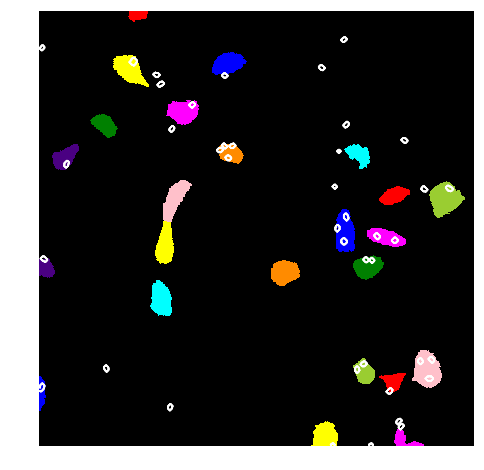

In [19]:
from skimage.color import label2rgb

plt.contour(Red_binary_open[frame], colors="white")
plt.imshow(label2rgb(fill_segmentation[frame], bg_label=0))
plt.axis("off")

(-56.975180833761435,
 1077.4431660521061,
 1080.0625180662807,
 -57.723589881632648)

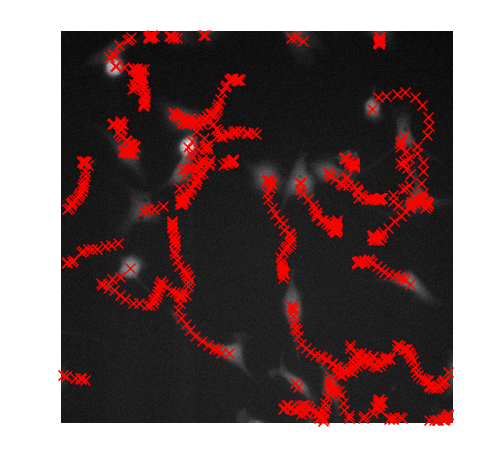

In [20]:
plt.imshow(img[-1], cmap="gray",interpolation='nearest')
for coor in result:           
            plt.scatter(coor[:,1], coor[:,0], s=100, marker = "x",c='r')
        
plt.axis("off")
#plt.savefig("bii_track/lastframe_track.png",bbox_inches='tight' , dpi = 300)

## Tracking the cells

In [21]:
list_track = tracking.track_multi(img, result)

## Visualizing the result

In [30]:
plot_track.browse_track_multi(img, list_track, fill_segmentation)

<img src= "GIF/roi2.gif">

In [23]:
df = pandas_track.create_pandas_track(list_track)

In [29]:
df.head()

x        y  Numb of para time point infected
cell_1 mother 0   11.428  228.319           0.0          1    False
              1  14.5646  228.274           0.0          2    False
              2  12.5946  229.097           0.0          3    False
              3  11.5607  233.513           0.0          4    False
              4  12.0705  234.034           0.0          5    False

In [25]:
import os
import imageio
import matplotlib.pyplot as plt

def create_GIF():
    
    path = "GIF"
    imageformat=".png"
    imfilelist=[os.path.join(path,f) for f in os.listdir(path) if f.endswith(imageformat)]
    
    images = []
    for filename in imfilelist:
        images.append(imageio.imread(filename))
    kargs = { 'duration': 0.4}
    imageio.mimsave('GIF/movie.gif', images, **kargs)